In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
train_datagram = ImageDataGenerator(rescale=1/255)
test_datagram = ImageDataGenerator(rescale=1/255)

x = train_datagram.flow_from_directory("/content/drive/MyDrive/ibm/fire/dataset/train_set",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')

y= test_datagram.flow_from_directory("/content/drive/MyDrive/ibm/fire/dataset/test_set",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 100 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [7]:
y.class_indices

{'forest': 0, 'with fire': 1}

In [8]:
#To define Linear initialisation import Sequential
from keras.models import Sequential
#To add layers import Dense
from keras.layers import Dense
#To create Convolution kernel import Convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [9]:
model = keras.Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten())

In [10]:
model.add(Dense(150,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.add(Dense(5,activation="softmax"))

In [11]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [12]:
r = model.fit(x,epochs = 10,validation_data = y)

Epoch 1/10
4/4 [==============================] - 50s 16s/step - loss: 0.6904 - accuracy: 0.5800 - val_loss: 0.6967 - val_accuracy: 0.4048
Epoch 2/10
4/4 [==============================] - 6s 2s/step - loss: 0.6876 - accuracy: 0.5800 - val_loss: 0.6963 - val_accuracy: 0.4048
Epoch 3/10
4/4 [==============================] - 6s 1s/step - loss: 0.6775 - accuracy: 0.5800 - val_loss: 0.6801 - val_accuracy: 0.4048
Epoch 4/10
4/4 [==============================] - 6s 2s/step - loss: 0.6637 - accuracy: 0.5800 - val_loss: 0.6735 - val_accuracy: 0.4048
Epoch 5/10
4/4 [==============================] - 6s 2s/step - loss: 0.6527 - accuracy: 0.5800 - val_loss: 0.6721 - val_accuracy: 0.4048
Epoch 6/10
4/4 [==============================] - 6s 2s/step - loss: 0.6427 - accuracy: 0.5800 - val_loss: 0.6685 - val_accuracy: 0.4048
Epoch 7/10
4/4 [==============================] - 6s 1s/step - loss: 0.6626 - accuracy: 0.5800 - val_loss: 0.6686 - val_accuracy: 0.4048
Epoch 8/10
4/4 [=======================

In [13]:
pred = model.predict(x)


2/2 [==============================] - 1s 116ms/step


In [14]:
pred

array([[0.5145488 ],
       [0.5122937 ],
       [0.61438465],
       [0.5122932 ],
       [0.61432105],
       [0.51557   ],
       [0.5122932 ],
       [0.51229346],
       [0.5122932 ],
       [0.5122932 ],
       [0.61438465],
       [0.5122932 ],
       [0.5122932 ],
       [0.5122932 ],
       [0.5122932 ],
       [0.61423045],
       [0.61438465],
       [0.5122932 ],
       [0.5122932 ],
       [0.61438465],
       [0.5122932 ],
       [0.51252985],
       [0.5122932 ],
       [0.61438465],
       [0.61438465],
       [0.5122932 ],
       [0.5122932 ],
       [0.5122932 ],
       [0.5122932 ],
       [0.61438465],
       [0.6143846 ],
       [0.5122975 ],
       [0.61437416],
       [0.61432916],
       [0.5122953 ],
       [0.51241386],
       [0.51229376],
       [0.5123522 ],
       [0.61438465],
       [0.5122932 ],
       [0.5229388 ],
       [0.6143846 ]], dtype=float32)

In [15]:
model.save("forest2.h5")

In [16]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
#import numpy
import numpy as np
#import cv2
import cv2

In [17]:
model = load_model("forest2.h5")

In [18]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("Fire")
    elif val == 0:
        plt.xlabel("No Fire")

1/1 [==============================] - 0s 114ms/step
[[0.5122932]]


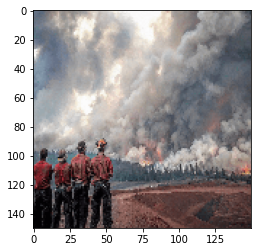

In [19]:
predictImage("/content/drive/MyDrive/ibm/fire/dataset/test_set/with fire/with fire (2).png")

In [20]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 6.7 MB/s 


In [21]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=216fb4c39f38987ff9a78bece5e05b278d10124ff7a857cb9f38d8794441ed6b
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [22]:
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#imort playsound package
from playsound import playsound

In [24]:
model = load_model(r'forest2.h5')
video = cv2.VideoCapture('/content/drive/MyDrive/ibm/fire/dataset/test/set/forest/with_fire (1).gif')
name = ['forest','with forest']

In [29]:
account_sid = 'AC2562c987764917ec2ab3dd4596fb018f'
auth_token = '99ff8a7b4f67593da70792e98189e823'
client = Client(account_sid, auth_token)

message = client.messages \
    .create(
         body='Forest fire is detected , stay alert',
         from_='+18583302139',
         to='+919952802334'
     )

print(message.sid)

SM11f00decfe06e998e3c91f2eb6f219b8


In [30]:
#import opencv library
import cv2
#import numpy
import numpy as np
#import images and load_model function from keras
from keras_preprocessing import image
from keras.models import load_model
#import client from twilio API
from  twilio.rest import Client
#import playsound package
from playsound import playsound

#load the saved model
model = load_model(r'forest2.h5')
video = cv2.VideoCapture('/content/drive/MyDrive/ibm/fire/dataset/test/set/forest/with_fire (1).gif')
name = ['forest','with fire']